In [2]:
import random

import GGanalysis as gg
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from endfield_gacha_model import *
from plot_tools import *

random.seed(0)


In [3]:
def 干员池抽一次(已抽次数, 六星水位, 五星水位, 已抽出当期UP6星干员):
    已抽次数 += 1
    if not 已抽出当期UP6星干员 and 已抽次数 == 120:
        return 6, True, 已抽次数, 0, 0, True
    六星概率 = operator_pity_6x[六星水位+1]
    五星概率 = operator_pity_5x[五星水位+1]
    r = random.random()
    if r < 六星概率:
        if random.random() < 1/2:
            return 6, True, 已抽次数, 0, 0, True
        else:
            return 6, False, 已抽次数, 0, 0, 已抽出当期UP6星干员
    elif r < 六星概率 + 五星概率:
        if random.random() < 1/2:
            return 5, True, 已抽次数, 六星水位+1, 0, 已抽出当期UP6星干员
        else:
            return 5, False, 已抽次数, 六星水位+1, 0, 已抽出当期UP6星干员
    else:
        return 4, None, 已抽次数, 六星水位+1, 五星水位+1, 已抽出当期UP6星干员


def 抽到1个任意6星干员():
    已抽次数 = 0
    六星水位 = 0
    五星水位 = 0
    已抽出当期UP6星干员 = False
    while True:
        抽到的星级, 是否是当期UP干员, 已抽次数, 六星水位, 五星水位, 已抽出当期UP6星干员 = 干员池抽一次(已抽次数, 六星水位, 五星水位, 已抽出当期UP6星干员)
        if 抽到的星级 == 6:
            return 已抽次数


def 抽到1个UP6星干员_无保底():
    已抽次数 = 0
    六星水位 = 0
    五星水位 = 0
    已抽出当期UP6星干员 = True
    while True:
        抽到的星级, 是否是当期UP干员, 已抽次数, 六星水位, 五星水位, 已抽出当期UP6星干员 = 干员池抽一次(已抽次数, 六星水位, 五星水位, 已抽出当期UP6星干员)
        if 抽到的星级 == 6 and 是否是当期UP干员:
            return 已抽次数


def 抽到1个UP6星干员_有保底():
    已抽次数 = 0
    六星水位 = 0
    五星水位 = 0
    已抽出当期UP6星干员 = False
    while True:
        抽到的星级, 是否是当期UP干员, 已抽次数, 六星水位, 五星水位, 已抽出当期UP6星干员 = 干员池抽一次(已抽次数, 六星水位, 五星水位, 已抽出当期UP6星干员)
        if 抽到的星级 == 6 and 是否是当期UP干员:
            return 已抽次数


def 抽到6个UP6星干员():
    已抽次数 = 0
    六星水位 = 0
    五星水位 = 0
    已抽出当期UP6星干员 = False
    抽到的当期UP6星干员数量 = 0
    while 抽到的当期UP6星干员数量 < 6:
        抽到的星级, 是否是当期UP干员, 已抽次数, 六星水位, 五星水位, 已抽出当期UP6星干员 = 干员池抽一次(已抽次数, 六星水位, 五星水位, 已抽出当期UP6星干员)
        if 抽到的星级 == 6 and 是否是当期UP干员:
            抽到的当期UP6星干员数量 += 1
    return 已抽次数


def 抽到1个任意5星干员():
    已抽次数 = 0
    六星水位 = 0
    五星水位 = 0
    已抽出当期UP6星干员 = False
    while True:
        抽到的星级, 是否是当期UP干员, 已抽次数, 六星水位, 五星水位, 已抽出当期UP6星干员 = 干员池抽一次(已抽次数, 六星水位, 五星水位, 已抽出当期UP6星干员)
        if 抽到的星级 == 5:
            return 已抽次数


def 抽到1个UP5星干员():
    已抽次数 = 0
    六星水位 = 0
    五星水位 = 0
    已抽出当期UP6星干员 = False
    while True:
        抽到的星级, 是否是当期UP干员, 已抽次数, 六星水位, 五星水位, 已抽出当期UP6星干员 = 干员池抽一次(已抽次数, 六星水位, 五星水位, 已抽出当期UP6星干员)
        if 抽到的星级 == 5 and 是否是当期UP干员:
            return 已抽次数


def 抽到6个UP5星干员():
    已抽次数 = 0
    六星水位 = 0
    五星水位 = 0
    已抽出当期UP6星干员 = False
    抽到的当期UP5星干员数量 = 0
    while 抽到的当期UP5星干员数量 < 6:
        抽到的星级, 是否是当期UP干员, 已抽次数, 六星水位, 五星水位, 已抽出当期UP6星干员 = 干员池抽一次(已抽次数, 六星水位, 五星水位, 已抽出当期UP6星干员)
        if 抽到的星级 == 5 and 是否是当期UP干员:
            抽到的当期UP5星干员数量 += 1
    return 已抽次数


def 抽齐UP6星干员和UP5星干员():
    已抽次数 = 0
    六星水位 = 0
    五星水位 = 0
    已抽出当期UP6星干员 = False
    抽到的当期UP6星干员数量 = 0
    抽到的当期UP5星干员数量 = 0
    while 抽到的当期UP6星干员数量 < 1 or 抽到的当期UP5星干员数量 < 1:
        抽到的星级, 是否是当期UP干员, 已抽次数, 六星水位, 五星水位, 已抽出当期UP6星干员 = 干员池抽一次(已抽次数, 六星水位, 五星水位, 已抽出当期UP6星干员)
        if 抽到的星级 == 6 and 是否是当期UP干员:
            抽到的当期UP6星干员数量 += 1
        if 抽到的星级 == 5 and 是否是当期UP干员:
            抽到的当期UP5星干员数量 += 1
    return 已抽次数


def 抽满潜UP6星干员和UP5星干员():
    已抽次数 = 0
    六星水位 = 0
    五星水位 = 0
    已抽出当期UP6星干员 = False
    抽到的当期UP6星干员数量 = 0
    抽到的当期UP5星干员数量 = 0
    while 抽到的当期UP6星干员数量 < 6 or 抽到的当期UP5星干员数量 < 6:
        抽到的星级, 是否是当期UP干员, 已抽次数, 六星水位, 五星水位, 已抽出当期UP6星干员 = 干员池抽一次(已抽次数, 六星水位, 五星水位, 已抽出当期UP6星干员)
        if 抽到的星级 == 6 and 是否是当期UP干员:
            抽到的当期UP6星干员数量 += 1
        if 抽到的星级 == 5 and 是否是当期UP干员:
            抽到的当期UP5星干员数量 += 1
    return 已抽次数


def 模拟(函数, 次数):
    结果 = [函数() for _ in range(次数)]
    分布列 = np.bincount(结果) / 次数
    return 分布列


(<Figure size 720x720 with 2 Axes>,
 (<Axes: title={'center': '概率质量函数'}, ylabel='本抽概率'>,
  <Axes: title={'center': '累积分布函数'}, xlabel='抽数', ylabel='累积概率'>))

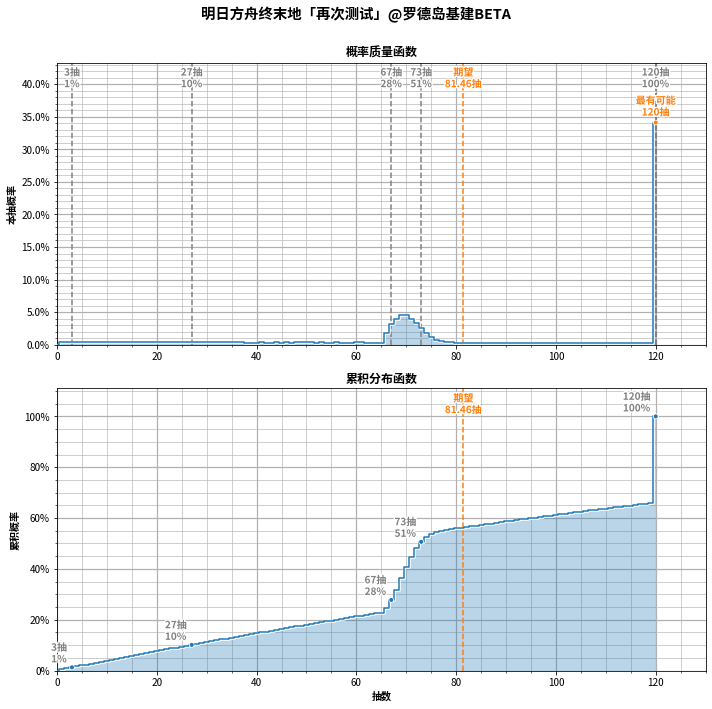

In [7]:
pmf = 模拟(抽到1个UP6星干员_有保底, 100000)
dist = gg.FiniteDist(pmf)
quantile_poses = [0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]

draw_pmf_cdf_fig(dist, "", quantile_poses, drawstyle="steps-mid", x_max=130)


In [1]:
pmf = 模拟(抽到1个UP6星干员, 1000000)
dist = gg.FiniteDist(pmf)
quantile_poses = [0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]

draw_pmf_cdf_fig(dist, "", quantile_poses, drawstyle="steps-mid", x_max=80)


NameError: name '模拟' is not defined

(<Figure size 720x720 with 2 Axes>,
 (<Axes: title={'center': '概率质量函数'}, ylabel='本抽概率'>,
  <Axes: title={'center': '累积分布函数'}, xlabel='抽数', ylabel='累积概率'>))

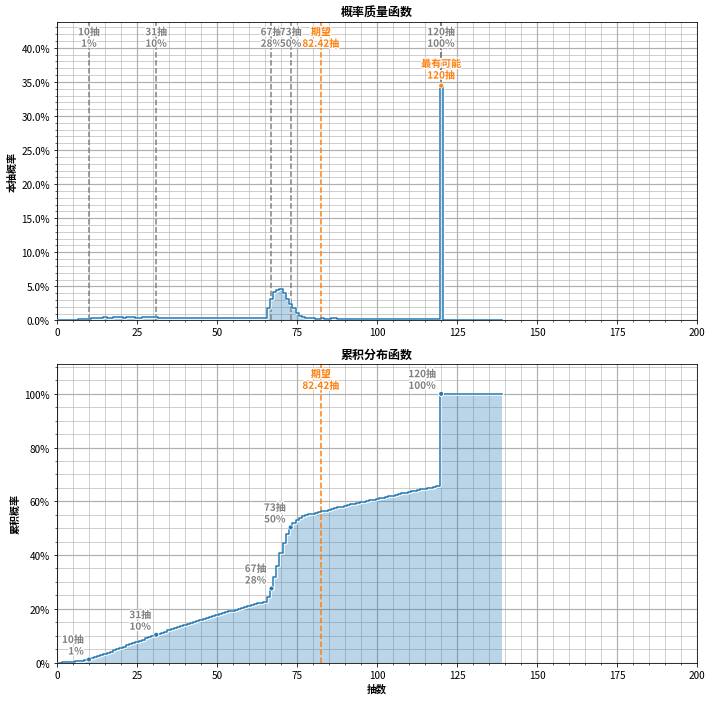

In [37]:
pmf = 模拟(抽齐UP6星干员和UP5星干员, 100000)
dist = gg.FiniteDist(pmf)
quantile_poses = [0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]

draw_pmf_cdf_fig(dist, "", quantile_poses, drawstyle="steps-mid", x_max=200)


(<Figure size 720x720 with 2 Axes>,
 (<Axes: title={'center': '概率质量函数'}, ylabel='本抽概率'>,
  <Axes: title={'center': '累积分布函数'}, xlabel='抽数', ylabel='累积概率'>))

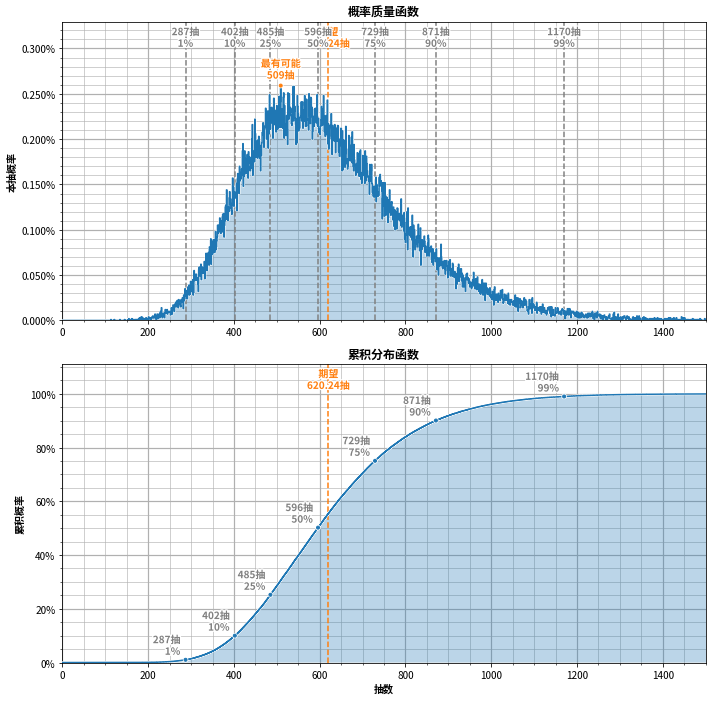

In [38]:
pmf = 模拟(抽满潜UP6星干员和UP5星干员, 100000)
dist = gg.FiniteDist(pmf)
quantile_poses = [0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]

draw_pmf_cdf_fig(dist, "", quantile_poses, drawstyle="steps-mid", x_max=1500)


In [64]:
def 抽到1个UP6星干员_有保底_歪的6星干员数量_5星干员数量():
    已抽次数 = 0
    六星水位 = 0
    五星水位 = 0
    已抽出当期UP6星干员 = False
    歪的6星干员数量 = 0
    五星干员数量 = 0
    while True:
        抽到的星级, 是否是当期UP干员, 已抽次数, 六星水位, 五星水位, 已抽出当期UP6星干员 = 干员池抽一次(已抽次数, 六星水位, 五星水位, 已抽出当期UP6星干员)
        if 抽到的星级 == 6 and not 是否是当期UP干员:
            歪的6星干员数量 += 1
        if 抽到的星级 == 5:
            五星干员数量 += 1
        if 抽到的星级 == 6 and 是否是当期UP干员:
            return 歪的6星干员数量, 五星干员数量


模拟次数 = 200000
M = 12
N = 30
联合分布 = np.zeros((M+1, N+1))
for _ in range(模拟次数):
    歪的6星干员数量, 五星干员数量 = 抽到1个UP6星干员_有保底_歪的6星干员数量_5星干员数量()
    i = np.clip(歪的6星干员数量, 0, M)
    j = np.clip(五星干员数量, 0, N)
    联合分布[i, j] += 1

联合分布 /= 模拟次数

import pandas as pd
df = pd.DataFrame(联合分布)
df.to_clipboard()


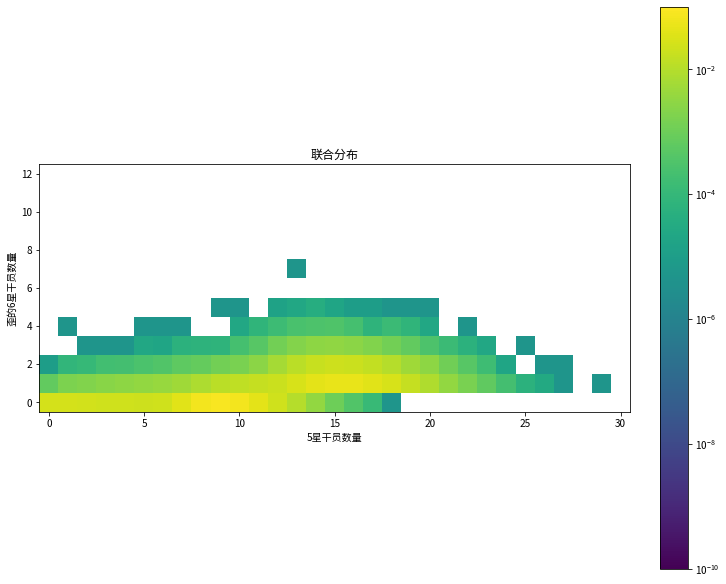

In [61]:

plt.figure(figsize=(10, 8), layout="constrained")
plt.imshow(联合分布, cmap="viridis", interpolation="nearest", origin="lower", norm=colors.LogNorm(vmin=1e-10, vmax=1e-1))
plt.colorbar()
plt.xlabel("5星干员数量")
plt.ylabel("歪的6星干员数量")
plt.title("联合分布")
plt.show()
